In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
dataset = pd.read_csv("MTA_Subway_Hourly_Ridership__Beginning_February_2022_20240307.csv", low_memory=False)

In [4]:
data = dataset.copy()
data.sample(3)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
5111042,06/18/2023 12:00:00 PM,subway,5,"36 Av (N,W)",Queens,omny,OMNY - Full Fare,113.0,2.0,40.756805,-73.92957305908203,POINT (-73.92957305908203 40.756805419921875)
5201310,06/17/2023 01:00:00 AM,subway,255,169 St (F),Queens,metrocard,Metrocard - Full Fare,3.0,0.0,40.710468,-73.7936019897461,POINT (-73.7936019897461 40.71046829223633)
2228248,07/29/2023 09:00:00 PM,subway,457,52 St (7),Queens,metrocard,Metrocard - Other,3.0,0.0,40.744148,-73.91255187988281,POINT (-73.91255187988281 40.74414825439453)


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

transit_timestamp      0
transit_mode           4
station_complex_id     4
station_complex        4
borough                4
payment_method         4
fare_class_category    4
ridership              4
transfers              4
latitude               4
longitude              4
Georeference           5
dtype: int64

In [7]:
data.dropna(axis=0, inplace=True)

In [8]:
data.isnull().sum()

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
Georeference           0
dtype: int64

In [9]:
data.shape

(6901060, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6901060 entries, 0 to 6901059
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transit_timestamp    object 
 1   transit_mode         object 
 2   station_complex_id   object 
 3   station_complex      object 
 4   borough              object 
 5   payment_method       object 
 6   fare_class_category  object 
 7   ridership            float64
 8   transfers            float64
 9   latitude             float64
 10  longitude            object 
 11  Georeference         object 
dtypes: float64(3), object(9)
memory usage: 684.5+ MB


In [11]:
data.transit_timestamp.value_counts()

transit_timestamp
06/06/2023 08:00:00 AM    3613
06/13/2023 08:00:00 AM    3606
06/07/2023 08:00:00 AM    3606
07/25/2023 08:00:00 AM    3604
05/24/2023 08:00:00 AM    3600
                          ... 
06/05/2023 02:00:00 AM    1422
07/03/2023 02:00:00 AM    1418
07/17/2023 02:00:00 AM    1402
05/30/2023 02:00:00 AM    1399
05/24/2023 12:00:00 AM    1361
Name: count, Length: 2376, dtype: int64

In [12]:
data[data.transit_timestamp == '  "error" : true']
data[data.transit_timestamp == '  "message" : "Internal error"']
data[data.transit_timestamp == '  "status" : 500']

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference


In [13]:
data.drop(data[data.transit_timestamp == '  "error" : true'].index, inplace=True)
data.drop(data[data.transit_timestamp == '  "message" : "Internal error"'].index, inplace=True)
data.drop(data[data.transit_timestamp == '  "status" : 500'].index, inplace=True)
data.drop(data[data.transit_timestamp == '}'].index, inplace=True)

In [14]:
data.transit_timestamp.value_counts()

transit_timestamp
06/06/2023 08:00:00 AM    3613
06/13/2023 08:00:00 AM    3606
06/07/2023 08:00:00 AM    3606
07/25/2023 08:00:00 AM    3604
05/24/2023 08:00:00 AM    3600
                          ... 
06/05/2023 02:00:00 AM    1422
07/03/2023 02:00:00 AM    1418
07/17/2023 02:00:00 AM    1402
05/30/2023 02:00:00 AM    1399
05/24/2023 12:00:00 AM    1361
Name: count, Length: 2376, dtype: int64

In [15]:
data['date'] = pd.to_datetime(data['transit_timestamp']).dt.date
data['time'] = pd.to_datetime(data['transit_timestamp']).dt.time
data['month'] = pd.to_datetime(data['transit_timestamp']).dt.strftime('%B')
data['day'] = pd.to_datetime(data['transit_timestamp']).dt.day
data['day_of_week'] = pd.to_datetime(data['transit_timestamp']).dt.dayofweek

C:\Users\leyla\AppData\Local\Temp\ipykernel_1548\1052607017.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['transit_timestamp']).dt.date
C:\Users\leyla\AppData\Local\Temp\ipykernel_1548\1052607017.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['transit_timestamp']).dt.time
C:\Users\leyla\AppData\Local\Temp\ipykernel_1548\1052607017.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['month'] = pd.to_datetime(data['transit_timestamp']).dt.strftime('%B')
C:\Users\leyla\AppData\Local\Temp\ipyk

In [16]:
data.sample(3)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,date,time,month,day,day_of_week
4313566,06/29/2023 04:00:00 PM,subway,386,Mt Eden Av (4),Bronx,metrocard,Metrocard - Fair Fare,16.0,0.0,40.844433,-73.91468811035156,POINT (-73.91468811035156 40.84443283081055),2023-06-29,16:00:00,June,29,3
2828865,07/21/2023 08:00:00 AM,subway,336,"Hoyt St (2,3)",Brooklyn,omny,OMNY - Full Fare,84.0,5.0,40.690544,-73.98506164550781,POINT (-73.98506164550781 40.69054412841797),2023-07-21,08:00:00,July,21,4
4278289,06/30/2023 05:00:00 AM,subway,33,45 St (R),Brooklyn,metrocard,Metrocard - Students,3.0,0.0,40.648937,-74.010009765625,POINT (-74.010009765625 40.6489372253418),2023-06-30,05:00:00,June,30,4


In [17]:
data.month.value_counts()

month
July      2125607
June      2122656
August    2090563
May        562234
Name: count, dtype: int64

In [18]:
data = data[data["month"] != 'May']

In [19]:
data.month.value_counts()

month
July      2125607
June      2122656
August    2090563
Name: count, dtype: int64

In [20]:
data.transit_mode.value_counts()

transit_mode
subway                   6291209
staten_island_railway      25131
tram                       22486
Name: count, dtype: int64

In [21]:
_ = data[data["transit_mode"]=="subway"]

> Sadece tramvay verilerinden oluşan veri setini oluşturdum.

In [22]:
df = _[[ 'station_complex_id', 'station_complex', 'borough', 'payment_method', 'fare_class_category', 'ridership', 
        'transfers', 'latitude', 'longitude', 'Georeference', 'date', 'time', 'month', 'day', 'day_of_week']]

In [23]:
df.borough.value_counts()

borough
Brooklyn     2257234
Manhattan    1927503
Queens       1128681
Bronx         977791
Name: count, dtype: int64

Text(0.5, 1.0, 'Count for Borough')

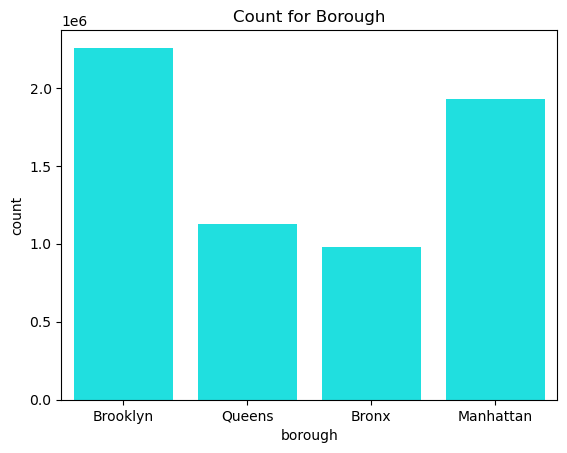

In [24]:
sns.countplot(x="borough", data=df, color="cyan")
plt.title('Count for Borough')

In [25]:
df.payment_method.value_counts()

payment_method
metrocard    5181701
omny         1109508
Name: count, dtype: int64

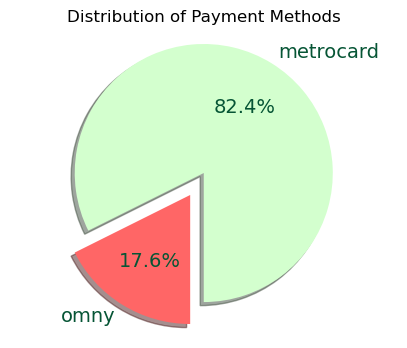

In [26]:
metrocard = df[df['payment_method']=="metrocard"].shape[0]
omny = df[df['payment_method']=="omny"].shape[0]

slices=[metrocard,omny]
labels=['metrocard','omny']
explode=[0.2,0]

colors = ['#d3ffce', '#ff6666']
#colors = ['#794044', '#065535']


fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(slices, explode=explode,colors= colors, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270,textprops={'fontsize': 14,'color':"#065535"})
ax1.axis('equal')  
plt.title('Distribution of Payment Methods')
plt.show()

In [29]:
df

,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,date,time,month,day,day_of_week
0,49,Avenue J (Q),Brooklyn,metrocard,Metrocard - Unlimited 7-Day,3.0,0.0,40.625038,-73.96080017089844,POINT (-73.96080017089844 40.625038146972656),2023-08-30,23:00:00,August,30,2
1,5,"36 Av (N,W)",Queens,metrocard,Metrocard - Fair Fare,2.0,0.0,40.756805,-73.92957305908203,POINT (-73.92957305908203 40.756805419921875),2023-08-30,23:00:00,August,30,2
2,5,"36 Av (N,W)",Queens,metrocard,Metrocard - Full Fare,10.0,0.0,40.756805,-73.92957305908203,POINT (-73.92957305908203 40.756805419921875),2023-08-30,23:00:00,August,30,2
3,5,"36 Av (N,W)",Queens,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.756805,-73.92957305908203,POINT (-73.92957305908203 40.756805419921875),2023-08-30,23:00:00,August,30,2
4,5,"36 Av (N,W)",Queens,metrocard,Metrocard - Unlimited 30-Day,2.0,0.0,40.756805,-73.92957305908203,POINT (-73.92957305908203 40.756805419921875),2023-08-30,23:00:00,August,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338821,625,"Delancey St (F)/Essex St (J,M,Z)",Manhattan,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.718613,-73.98811340332031,POINT (-73.98811340332031 40.71861267089844),2023-06-01,00:00:00,June,1,3
6338822,625,"Delancey St (F)/Essex St (J,M,Z)",Manhattan,metrocard,Metrocard - Full Fare,37.0,1.0,40.718613,-73.98743438720703,POINT (-73.98743438720703 40.71861267089844),2023-06-01,00:00:00,June,1,3
6338823,625,"Delancey St (F)/Essex St (J,M,Z)",Manhattan,metrocard,Metrocard - Unlimited 30-Day,24.0,0.0,40.718613,-73.98743438720703,POINT (-73.98743438720703 40.71861267089844),2023-06-01,00:00:00,June,1,3
6338824,625,"Delancey St (F)/Essex St (J,M,Z)",Manhattan,omny,OMNY - Full Fare,210.0,0.0,40.718613,-73.98743438720703,POINT (-73.98743438720703 40.71861267089844),2023-06-01,00:00:00,June,1,3


In [33]:
df.fare_class_category.value_counts()

fare_class_category
OMNY - Full Fare                    878986
Metrocard - Full Fare               865078
Metrocard - Unlimited 7-Day         851155
Metrocard - Unlimited 30-Day        823502
Metrocard - Other                   800504
Metrocard - Fair Fare               765708
Metrocard - Seniors & Disability    703152
Metrocard - Students                372602
OMNY - Seniors & Disability         213015
OMNY - Other                         17507
Name: count, dtype: int64

In [34]:
df.groupby(['month','station_complex'])[['ridership']].sum().sort_values('ridership', ascending=False).reset_index().head(10)

,month,station_complex,ridership
0,June,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",3703208.0
1,July,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",3697406.0
2,August,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",3626295.0
3,June,"Grand Central-42 St (S,4,5,6,7)",2659208.0
4,July,"Grand Central-42 St (S,4,5,6,7)",2571958.0
5,August,"Grand Central-42 St (S,4,5,6,7)",2546774.0
6,June,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",1970789.0
7,August,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",1917076.0
8,July,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",1895278.0
9,June,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",1781688.0


In [35]:
new_df = df.groupby(['station_complex'])[['ridership']].sum().sort_values('ridership', ascending=False).reset_index().head(10)
new_df

,station_complex,ridership
0,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",11026909.0
1,"Grand Central-42 St (S,4,5,6,7)",7777940.0
2,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",5783143.0
3,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",5096464.0
4,"Fulton St (A,C,J,Z,2,3,4,5)",4541675.0
5,"34 St-Penn Station (A,C,E)",4276575.0
6,"34 St-Penn Station (1,2,3)",3763316.0
7,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",3718209.0
8,"59 St-Columbus Circle (A,B,C,D,1)",3695250.0
9,Flushing-Main St (7),3541187.0


Text(0.5, 1.0, 'The 10 Busiest Stations')

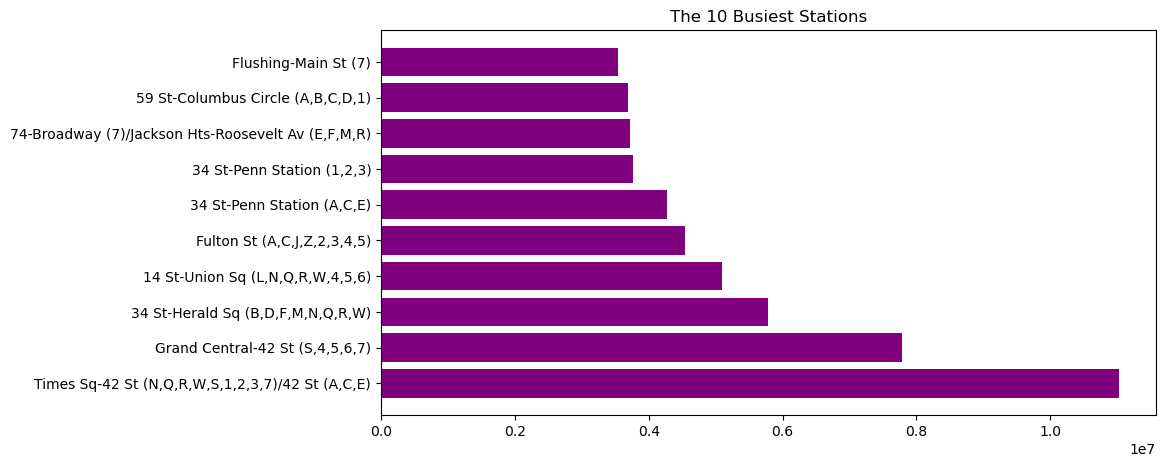

In [36]:
plt.figure(figsize=[10,5])
plt.barh(y = new_df["station_complex"], width = new_df["ridership"], color='purple')
plt.title('The 10 Busiest Stations')

In [37]:
df[df["station_complex"] == "Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)"]  # en yoğun istasyonun verilerini filtreledim

,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,date,time,month,day,day_of_week
2366,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Manhattan,metrocard,Metrocard - Other,137.0,0.0,40.757309,-73.98675537109375,POINT (-73.98675537109375 40.75730895996094),2023-08-30,23:00:00,August,30,2
2367,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Manhattan,metrocard,Metrocard - Full Fare,610.0,1.0,40.757309,-73.98675537109375,POINT (-73.98675537109375 40.75730895996094),2023-08-30,23:00:00,August,30,2
2368,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Manhattan,metrocard,Metrocard - Seniors & Disability,77.0,0.0,40.757309,-73.98675537109375,POINT (-73.98675537109375 40.75730895996094),2023-08-30,23:00:00,August,30,2
2375,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Manhattan,metrocard,Metrocard - Fair Fare,107.0,1.0,40.757309,-73.98675537109375,POINT (-73.98675537109375 40.75730895996094),2023-08-30,23:00:00,August,30,2
2382,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Manhattan,metrocard,Metrocard - Unlimited 7-Day,656.0,0.0,40.757309,-73.98675537109375,POINT (-73.98675537109375 40.75730895996094),2023-08-30,23:00:00,August,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338715,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Manhattan,metrocard,Metrocard - Seniors & Disability,28.0,0.0,40.757309,-73.98749542236328,POINT (-73.98749542236328 40.75730895996094),2023-06-01,00:00:00,June,1,3
6338722,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Manhattan,metrocard,Metrocard - Fair Fare,63.0,0.0,40.757309,-73.98675537109375,POINT (-73.98675537109375 40.75730895996094),2023-06-01,00:00:00,June,1,3
6338723,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Manhattan,omny,OMNY - Full Fare,828.0,1.0,40.757309,-73.98675537109375,POINT (-73.98675537109375 40.75730895996094),2023-06-01,00:00:00,June,1,3
6338730,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Manhattan,metrocard,Metrocard - Unlimited 7-Day,318.0,0.0,40.757309,-73.98675537109375,POINT (-73.98675537109375 40.75730895996094),2023-06-01,00:00:00,June,1,3


In [38]:
best_station = df[df["station_complex"] == "Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)"]

In [39]:
best = best_station.groupby(['date','time'])[['ridership']].sum().sort_values('ridership', ascending=False).reset_index().head(50)
best.head()

,date,time,ridership
0,2023-07-26,17:00:00,16611.0
1,2023-06-21,17:00:00,16049.0
2,2023-06-13,17:00:00,16034.0
3,2023-07-12,17:00:00,15911.0
4,2023-06-14,17:00:00,15896.0


Text(0.5, 1.0, 'Heat Map of The Busiest Station')

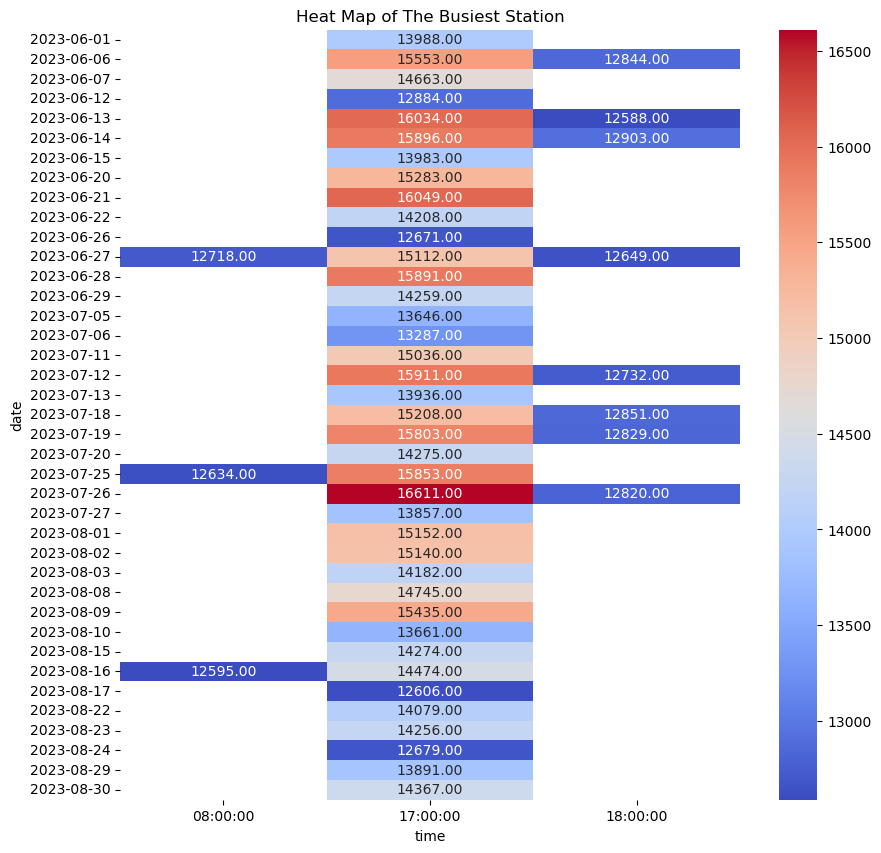

In [40]:
plt.figure(figsize=[10,10])
first_station = best.pivot_table(index='date', columns='time', values='ridership', aggfunc='sum')
sns.heatmap(first_station, cmap='coolwarm',  annot=True, fmt='.2f')
plt.title('Heat Map of The Busiest Station')

In [41]:
df[df["station_complex"] == "Grand Central-42 St (S,4,5,6,7)"]  # en yoğun 2. istasyonun verilerini filtreledim

,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,date,time,month,day,day_of_week
2356,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,metrocard,Metrocard - Fair Fare,43.0,1.0,40.751778,-73.97684478759766,POINT (-73.97684478759766 40.75177764892578),2023-08-30,23:00:00,August,30,2
2369,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,metrocard,Metrocard - Full Fare,278.0,3.0,40.751778,-73.97684478759766,POINT (-73.97684478759766 40.75177764892578),2023-08-30,23:00:00,August,30,2
2370,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,metrocard,Metrocard - Other,105.0,0.0,40.751778,-73.97684478759766,POINT (-73.97684478759766 40.75177764892578),2023-08-30,23:00:00,August,30,2
2371,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,metrocard,Metrocard - Seniors & Disability,27.0,0.0,40.751778,-73.97684478759766,POINT (-73.97684478759766 40.75177764892578),2023-08-30,23:00:00,August,30,2
2372,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,metrocard,Metrocard - Unlimited 30-Day,145.0,0.0,40.751778,-73.97684478759766,POINT (-73.97684478759766 40.75177764892578),2023-08-30,23:00:00,August,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338717,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,metrocard,Metrocard - Other,40.0,0.0,40.751778,-73.97684478759766,POINT (-73.97684478759766 40.75177764892578),2023-06-01,00:00:00,June,1,3
6338718,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,metrocard,Metrocard - Full Fare,235.0,2.0,40.751778,-73.97684478759766,POINT (-73.97684478759766 40.75177764892578),2023-06-01,00:00:00,June,1,3
6338719,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,metrocard,Metrocard - Unlimited 30-Day,91.0,0.0,40.751778,-73.97684478759766,POINT (-73.97684478759766 40.75177764892578),2023-06-01,00:00:00,June,1,3
6338720,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,omny,OMNY - Full Fare,298.0,1.0,40.751778,-73.97684478759766,POINT (-73.97684478759766 40.75177764892578),2023-06-01,00:00:00,June,1,3


Text(0.5, 1.0, 'Heat Map of The 2nd busiest station')

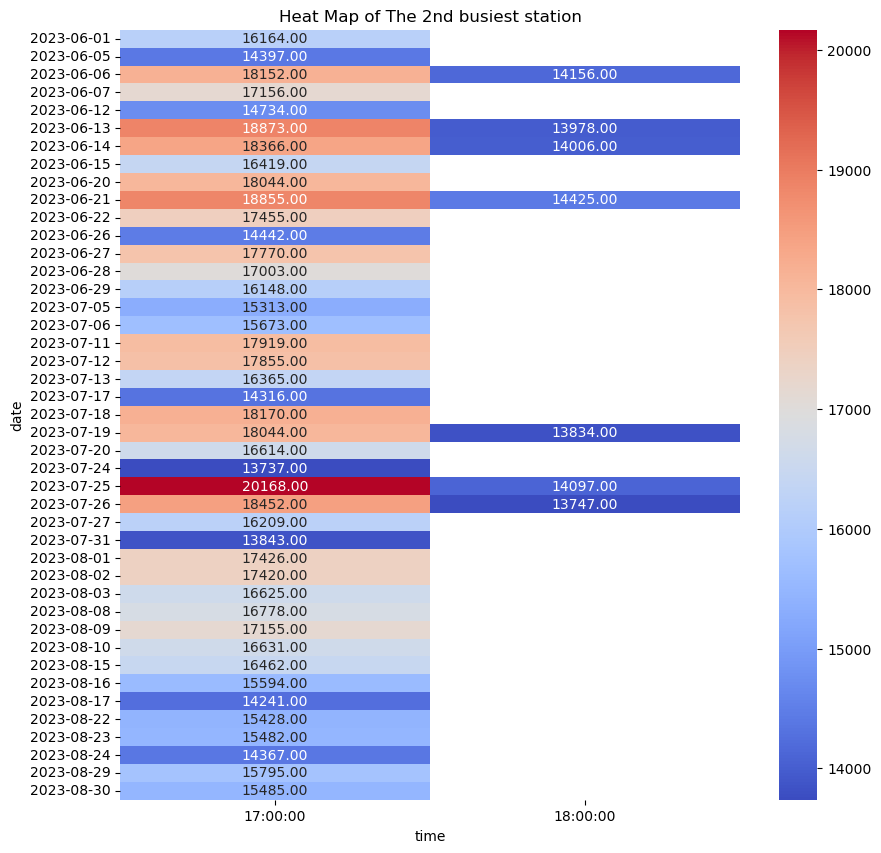

In [42]:
plt.figure(figsize=[10,10])
best_second_station = df[df["station_complex"] == "Grand Central-42 St (S,4,5,6,7)"]
best_second = best_second_station.groupby(['date','time'])[['ridership']].sum().sort_values('ridership', ascending=False).reset_index().head(50)
best_second.head()
second_station = best_second.pivot_table(index='date', columns='time', values='ridership', aggfunc='sum')
sns.heatmap(second_station, cmap='coolwarm',  annot=True, fmt='.2f')
plt.title('Heat Map of The 2nd busiest station')